In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.preprocessing

import wrangle

In [2]:
df = wrangle.wrangle_zillow()
train,val,test = wrangle.split_zillow(df)

In [3]:
df

,year,beds,baths,area,tax_value,prop_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
3,1972,0,0.0,1200,5328,91.60,LA
4,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


In [4]:
train

,year,beds,baths,area,tax_value,prop_tax,county
785280,1946,2,1.0,777,350556,4230.50,LA
1686300,1938,2,1.0,1014,192599,2567.76,LA
1710689,1958,3,2.0,1762,480000,5566.82,Orange
956813,1952,1,1.0,616,131512,1694.62,LA
322107,1954,3,2.0,1495,84031,1064.10,LA
...,...,...,...,...,...,...,...
92687,1954,3,2.0,2309,459631,5669.94,LA
1589715,1996,4,3.0,2516,543478,6517.17,LA
1137442,1945,3,1.0,1003,61460,1371.40,LA
232483,2000,3,3.0,1865,243515,2829.60,Orange


In [5]:
Xtr, Xv, Xt = train[['year','beds','baths','area','prop_tax','county']],val[['year','beds','baths','area','prop_tax','county']],test[['year','beds','baths','area','prop_tax','county']]
ytr, yv, yt = train.prop_value,val.prop_value,test.prop_value

In [6]:
Xtr

,year,beds,baths,area,prop_tax,county
785280,1946,2,1.0,777,4230.50,LA
1686300,1938,2,1.0,1014,2567.76,LA
1710689,1958,3,2.0,1762,5566.82,Orange
956813,1952,1,1.0,616,1694.62,LA
322107,1954,3,2.0,1495,1064.10,LA
...,...,...,...,...,...,...
92687,1954,3,2.0,2309,5669.94,LA
1589715,1996,4,3.0,2516,6517.17,LA
1137442,1945,3,1.0,1003,1371.40,LA
232483,2000,3,3.0,1865,2829.60,Orange


# Scaling Exercises

In [7]:
# linear scaling
# sklearn.preprocessing.MinMaxScaler()
# sklearn.preprocessing.StandardScaler()
# sklearn.preprocessing.RobustScaler()

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [8]:
scale = Xtr.columns[:-1].to_list()
mm_scale = sklearn.preprocessing.MinMaxScaler()
Xtr_mm_scale = pd.DataFrame(data=mm_scale.fit_transform(Xtr[scale]),columns=scale)

std_scale = sklearn.preprocessing.StandardScaler()
Xtr_std_scale = pd.DataFrame(std_scale.fit_transform(Xtr[scale]),columns=scale)

rob_scale = sklearn.preprocessing.RobustScaler()
Xtr_rob_scale = pd.DataFrame(rob_scale.fit_transform(Xtr[scale]),columns=scale)

In [9]:
Xtr_mm_scale

,year,beds,baths,area,prop_tax
0,0.674419,0.1250,0.05,0.032041,0.042018
1,0.637209,0.1250,0.05,0.041827,0.025451
2,0.730233,0.1875,0.10,0.072712,0.055332
3,0.702326,0.0625,0.05,0.025393,0.016751
4,0.711628,0.1875,0.10,0.061687,0.010469
...,...,...,...,...,...
1219897,0.711628,0.1875,0.10,0.095297,0.056360
1219898,0.906977,0.2500,0.15,0.103844,0.064801
1219899,0.669767,0.1875,0.05,0.041372,0.013531
1219900,0.925581,0.1875,0.15,0.076964,0.028060


In [10]:
Xtr_std_scale

,year,beds,baths,area,prop_tax
0,-0.662659,-1.401541,-1.367190,-1.341940,-0.096754
1,-1.034027,-1.401541,-1.367190,-1.015558,-0.681476
2,-0.105607,-0.287007,-0.169155,0.014540,0.373179
3,-0.384133,-2.516074,-1.367190,-1.563659,-0.988525
4,-0.291291,-0.287007,-0.169155,-0.353156,-1.210255
...,...,...,...,...,...
1219897,-0.291291,-0.287007,-0.169155,0.767834,0.409442
1219898,1.658391,0.827526,1.028880,1.052901,0.707381
1219899,-0.709080,-0.287007,-1.367190,-1.030707,-1.102189
1219900,1.844075,-0.287007,1.028880,0.156385,-0.589396


In [11]:
Xtr_rob_scale

,year,beds,baths,area,prop_tax
0,-0.48,-1.0,-1.0,-0.937500,0.084413
1,-0.80,-1.0,-1.0,-0.663194,-0.393225
2,0.00,0.0,0.0,0.202546,0.468283
3,-0.24,-2.0,-1.0,-1.123843,-0.644043
4,-0.16,0.0,0.0,-0.106481,-0.825165
...,...,...,...,...,...
1219897,-0.16,0.0,0.0,0.835648,0.497905
1219898,1.52,1.0,1.0,1.075231,0.741280
1219899,-0.52,0.0,-1.0,-0.675926,-0.736891
1219900,1.68,0.0,1.0,0.321759,-0.318009


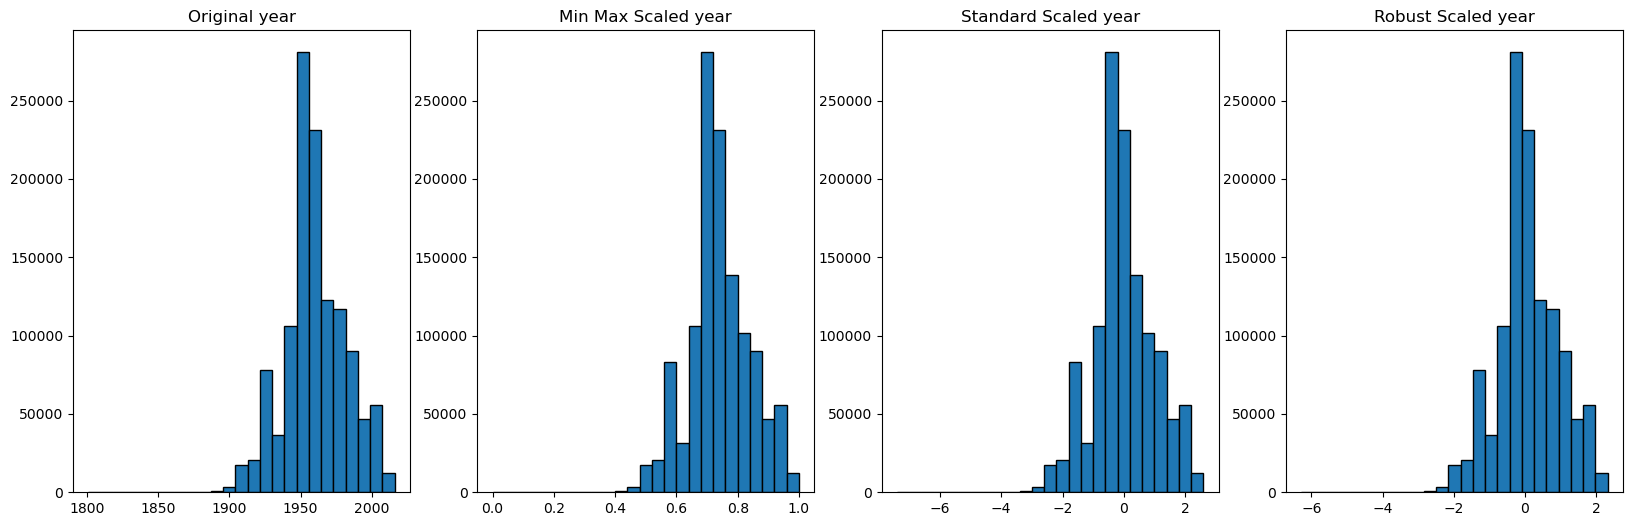

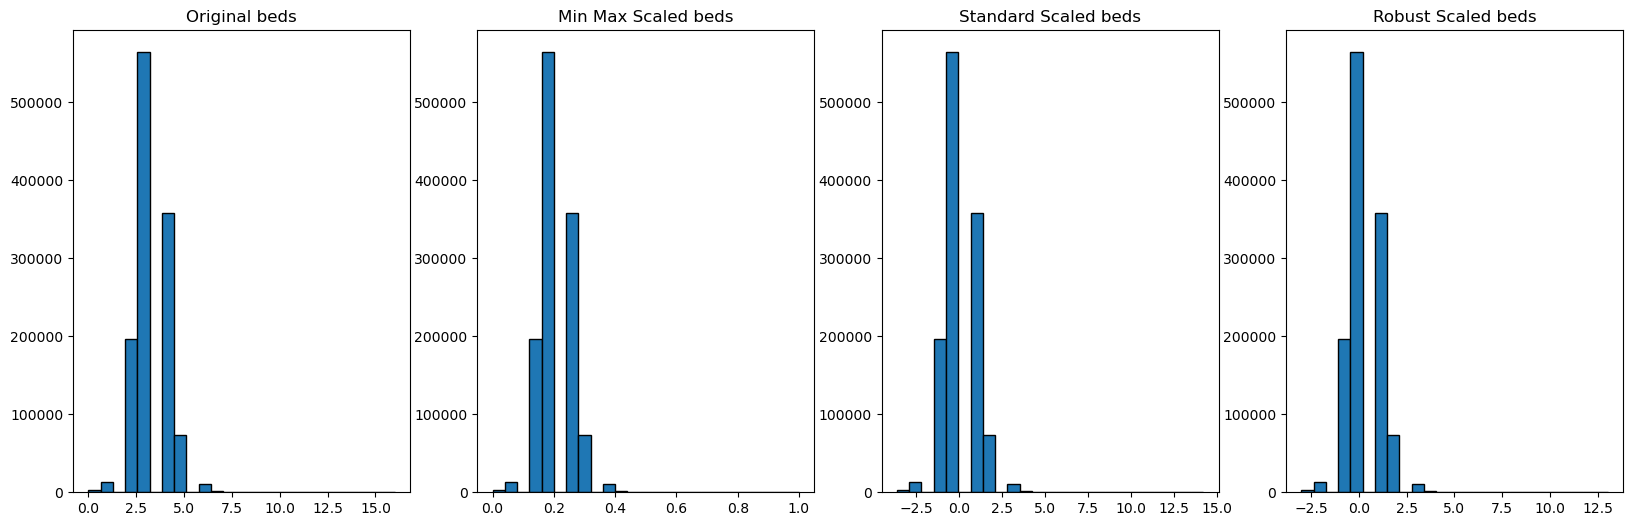

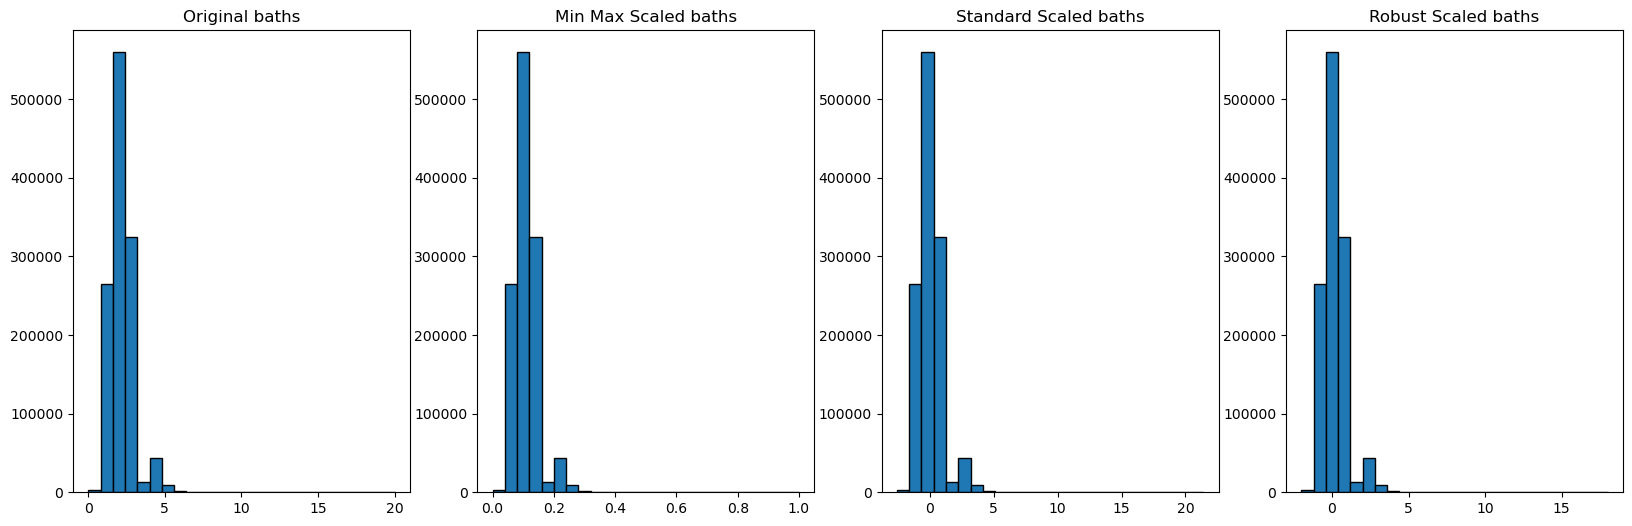

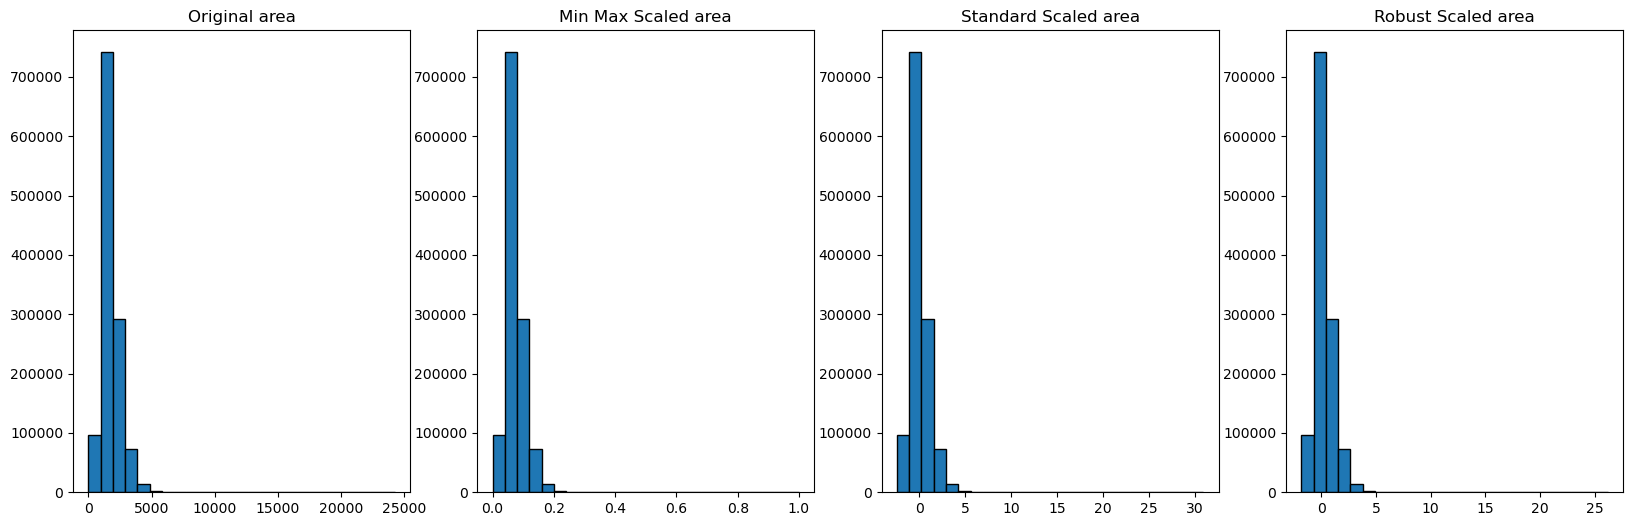

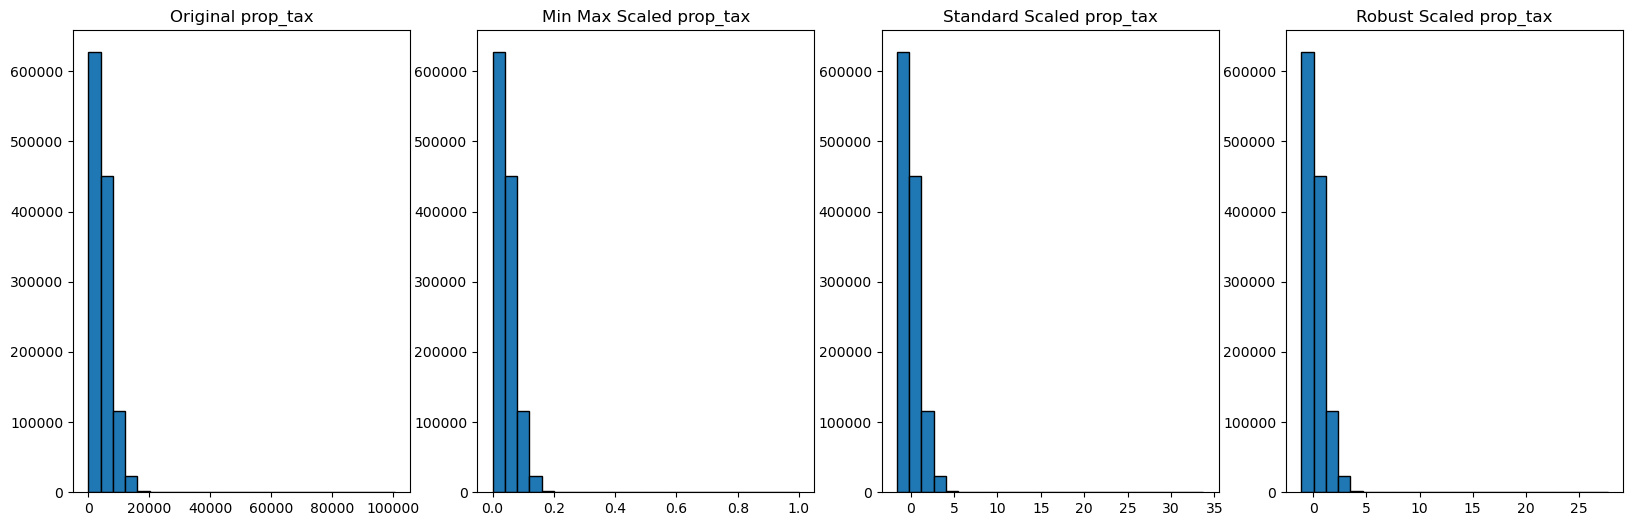

In [12]:
for col in scale:
    plt.figure(figsize=(20, 6))
    plt.subplot(141)
    plt.hist(Xtr[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(142)
    plt.hist(Xtr_mm_scale[col], bins=25, ec='black')
    plt.title(f'Min Max Scaled {col}')
    plt.subplot(143)
    plt.hist(Xtr_std_scale[col], bins=25, ec='black')
    plt.title(f'Standard Scaled {col}')
    plt.subplot(144)
    plt.hist(Xtr_rob_scale[col], bins=25, ec='black')
    plt.title(f'Robust Scaled {col}')
    plt.show()

#### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?


In [13]:
Xtr_mm_scale

,year,beds,baths,area,prop_tax
0,0.674419,0.1250,0.05,0.032041,0.042018
1,0.637209,0.1250,0.05,0.041827,0.025451
2,0.730233,0.1875,0.10,0.072712,0.055332
3,0.702326,0.0625,0.05,0.025393,0.016751
4,0.711628,0.1875,0.10,0.061687,0.010469
...,...,...,...,...,...
1219897,0.711628,0.1875,0.10,0.095297,0.056360
1219898,0.906977,0.2500,0.15,0.103844,0.064801
1219899,0.669767,0.1875,0.05,0.041372,0.013531
1219900,0.925581,0.1875,0.15,0.076964,0.028060


In [14]:
pd.DataFrame(mm_scale.inverse_transform(Xtr_mm_scale),columns=scale)

,year,beds,baths,area,prop_tax
0,1946.0,2.0,1.0,777.0,4230.50
1,1938.0,2.0,1.0,1014.0,2567.76
2,1958.0,3.0,2.0,1762.0,5566.82
3,1952.0,1.0,1.0,616.0,1694.62
4,1954.0,3.0,2.0,1495.0,1064.10
...,...,...,...,...,...
1219897,1954.0,3.0,2.0,2309.0,5669.94
1219898,1996.0,4.0,3.0,2516.0,6517.17
1219899,1945.0,3.0,1.0,1003.0,1371.40
1219900,2000.0,3.0,3.0,1865.0,2829.60


In [15]:
Xtr

,year,beds,baths,area,prop_tax,county
785280,1946,2,1.0,777,4230.50,LA
1686300,1938,2,1.0,1014,2567.76,LA
1710689,1958,3,2.0,1762,5566.82,Orange
956813,1952,1,1.0,616,1694.62,LA
322107,1954,3,2.0,1495,1064.10,LA
...,...,...,...,...,...,...
92687,1954,3,2.0,2309,5669.94,LA
1589715,1996,4,3.0,2516,6517.17,LA
1137442,1945,3,1.0,1003,1371.40,LA
232483,2000,3,3.0,1865,2829.60,Orange


#### 3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.


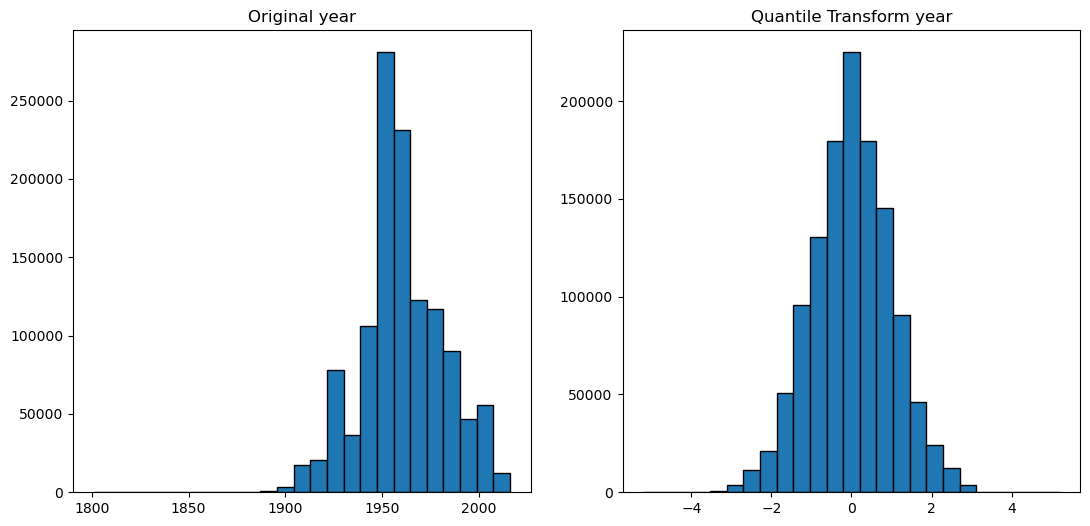

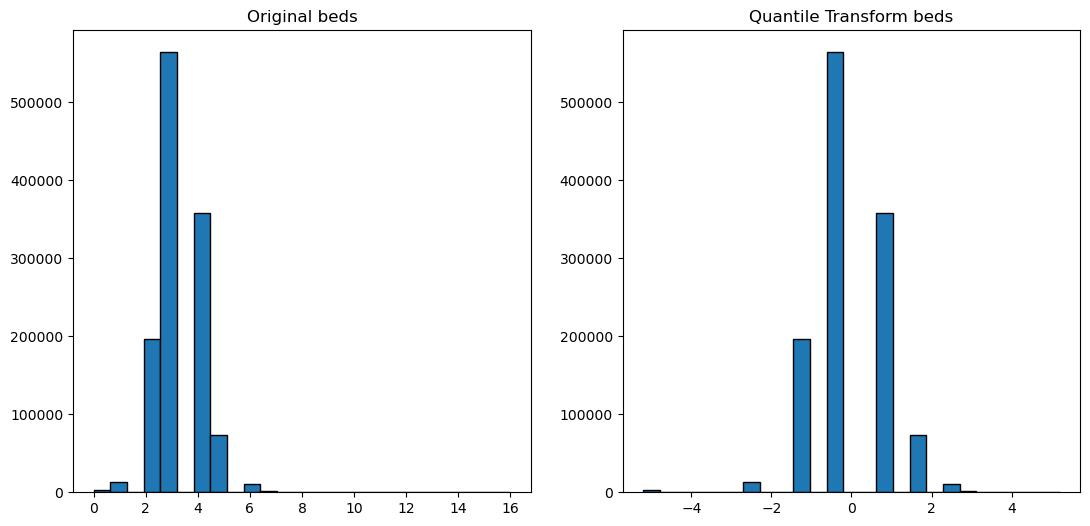

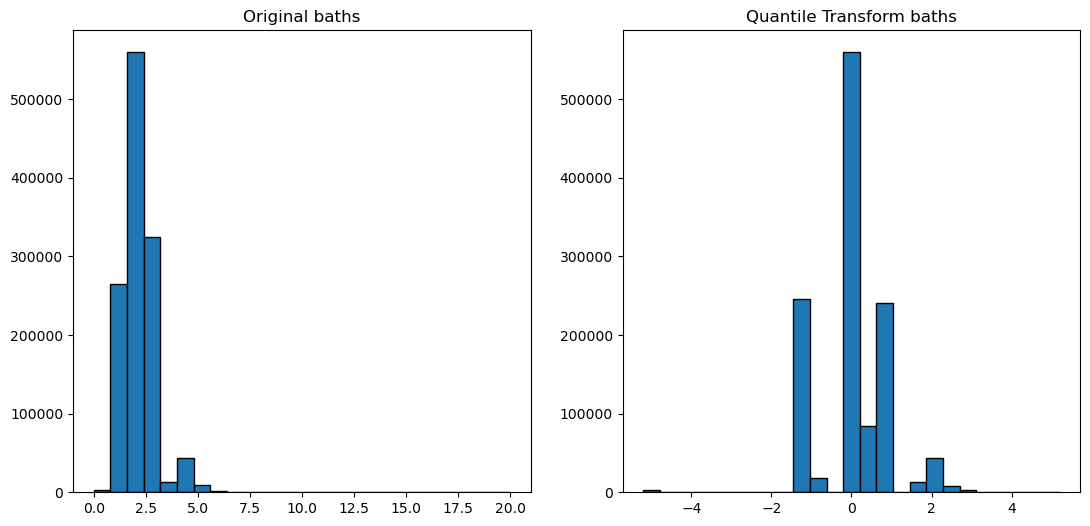

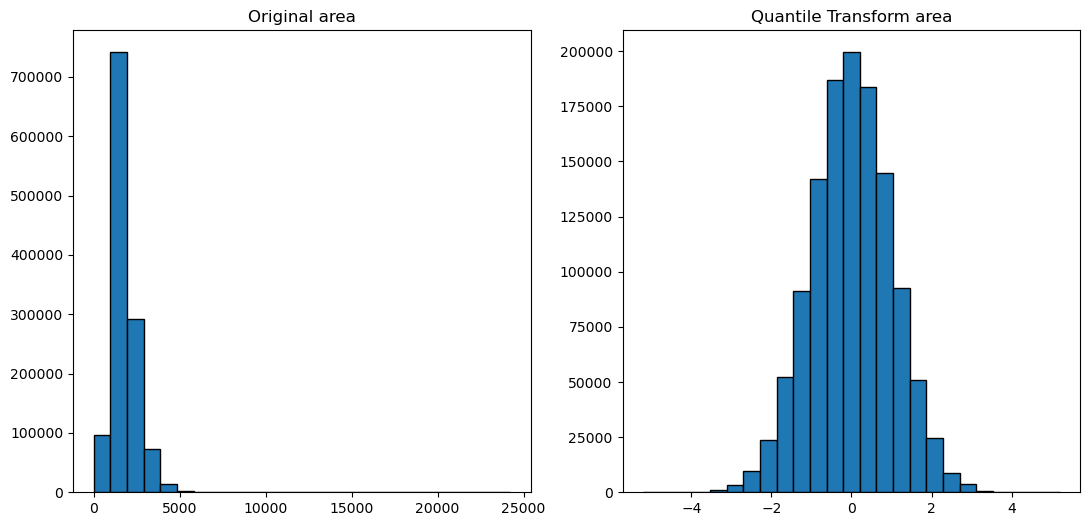

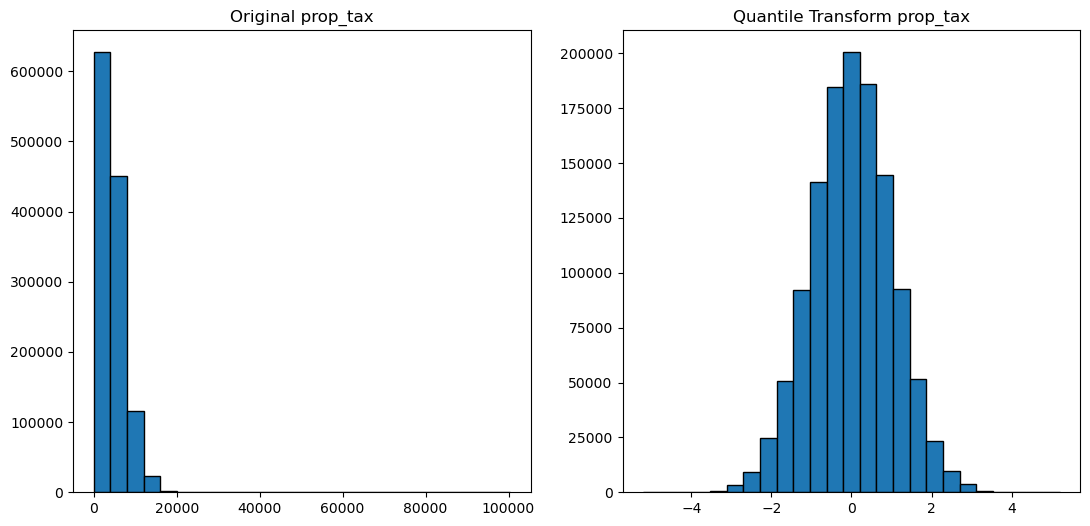

In [16]:
qt_norm = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
Xtr_qt = pd.DataFrame(qt_norm.fit_transform(Xtr[scale]),columns=scale)
for col in scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(Xtr[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(Xtr_qt[col], bins=25, ec='black')
    plt.title(f'Quantile Transform {col}')
    plt.show()

#### 4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?


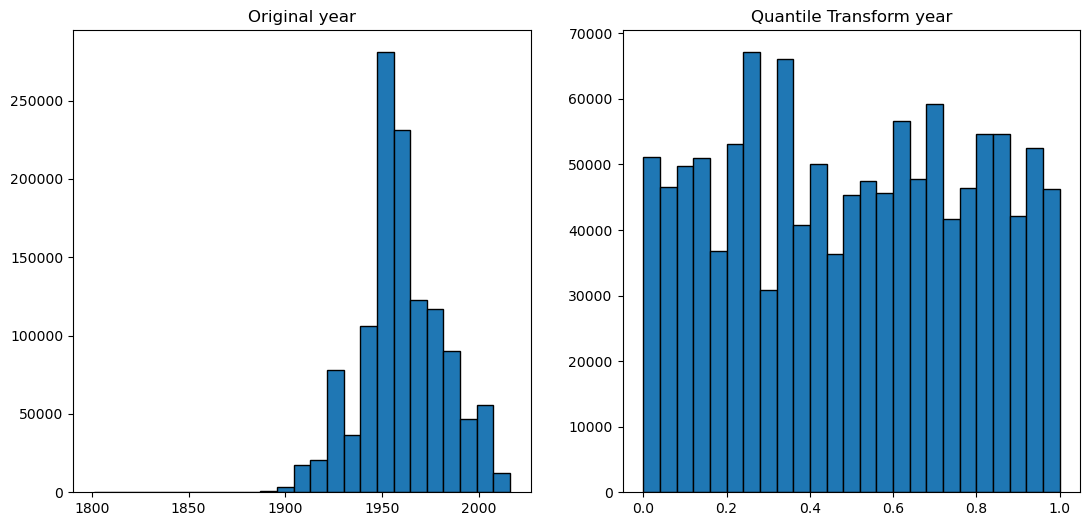

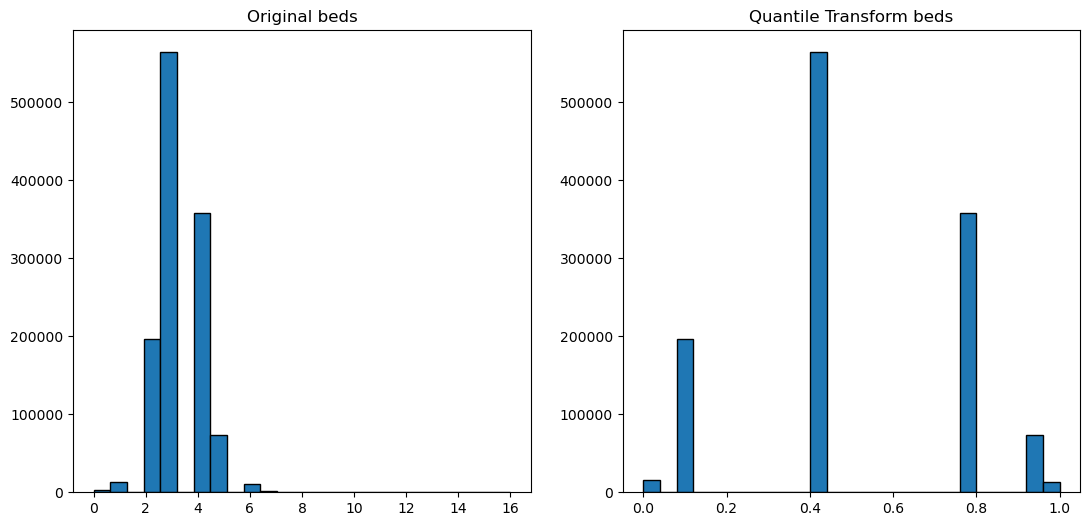

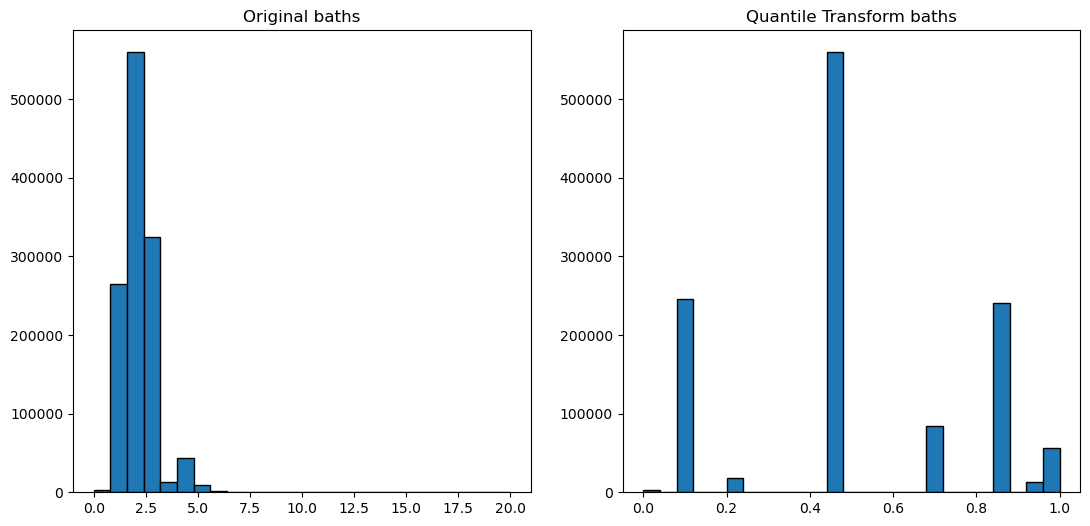

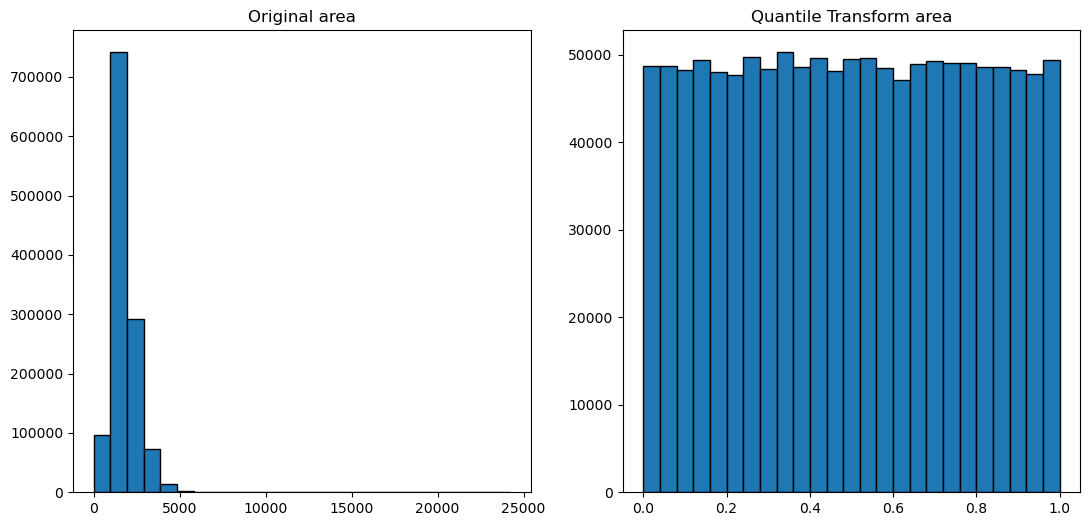

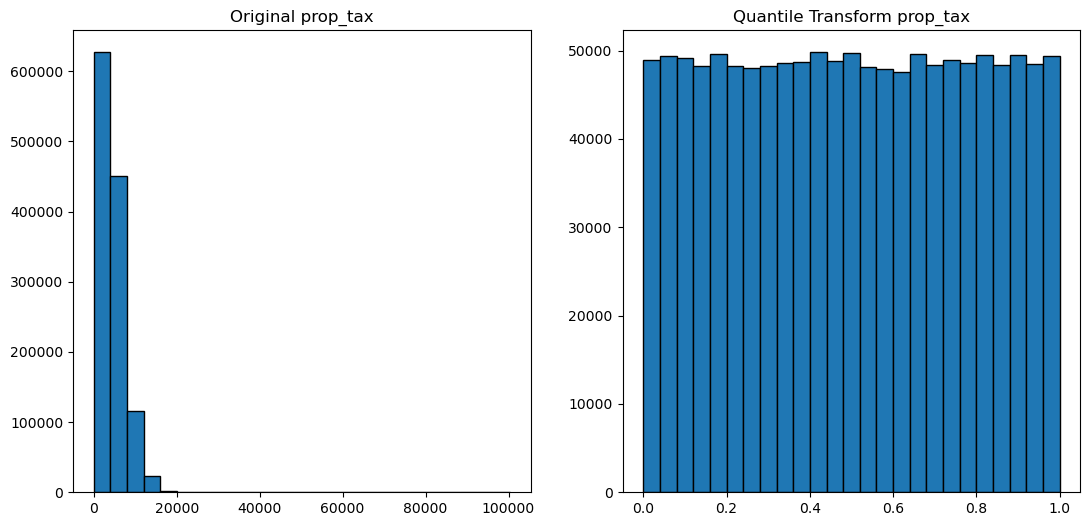

In [17]:
qt_uni = sklearn.preprocessing.QuantileTransformer()
Xtr_qt = pd.DataFrame(qt_uni.fit_transform(Xtr[scale]),columns=scale)
for col in scale:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(Xtr[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(Xtr_qt[col], bins=25, ec='black')
    plt.title(f'Quantile Transform {col}')
    plt.show()

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [18]:
def rob_scaler(train,validate,test):
    rob_scale = sklearn.preprocessing.RobustScaler()
    Xtr,Xv,Xt = train,validate,test
    scale = train.columns[:-1].to_list()
    Xtr[scale] = rob_scale.fit_transform(Xtr[scale])
    Xv[scale] = rob_scale.transform(Xv[scale])
    Xt[scale] = rob_scale.transform(Xt[scale])
    return Xtr, Xv, Xt

In [19]:
Xtr,Xv,Xt = rob_scaler(train,val,test)
Xtr

,year,beds,baths,area,tax_value,prop_tax,county
785280,-0.48,-1.0,-1.0,-0.937500,0.122775,0.084413,LA
1686300,-0.80,-1.0,-1.0,-0.663194,-0.387141,-0.393225,LA
1710689,0.00,0.0,0.0,0.202546,0.540645,0.468283,Orange
956813,-0.24,-2.0,-1.0,-1.123843,-0.584341,-0.644043,LA
322107,-0.16,0.0,0.0,-0.106481,-0.737619,-0.825165,LA
...,...,...,...,...,...,...,...
92687,-0.16,0.0,0.0,0.835648,0.474890,0.497905,LA
1589715,1.52,1.0,1.0,1.075231,0.745564,0.741280,LA
1137442,-0.52,0.0,-1.0,-0.675926,-0.810483,-0.736891,LA
232483,1.68,0.0,1.0,0.321759,-0.222774,-0.318009,Orange


In [20]:
def quant_tf(train,validate,test,out_dist='normal'):
    qt = sklearn.preprocessing.QuantileTransformer(output_distribution=out_dist)
    Xtr,Xv,Xt = train,validate,test
    scale = train.columns[:-1].to_list()
    Xtr[scale] = qt.fit_transform(Xtr[scale])
    Xv[scale] = qt.transform(Xv[scale])
    Xt[scale] = qt.transform(Xt[scale])
    return Xtr, Xv, Xt

In [21]:

Xtr,Xv,Xt = quant_tf(train,val,test)
Xtr

,year,beds,baths,area,tax_value,prop_tax,county
785280,-0.873515,-1.312981,-1.264066,-2.004234,0.164154,0.109872,LA
1686300,-1.140077,-1.312981,-1.264066,-1.280981,-0.611125,-0.618899,LA
1710689,0.008782,-0.240671,-0.128317,0.269184,0.643026,0.564429,Orange
956813,-0.443149,-2.408550,-1.264066,-2.511791,-0.945328,-1.028284,LA
322107,-0.286135,-0.240671,-0.128317,-0.158740,-1.296088,-1.523856,LA
...,...,...,...,...,...,...,...
92687,-0.286135,-0.240671,-0.128317,0.892973,0.573224,0.595481,LA
1589715,1.490335,0.776528,1.018778,1.096928,0.835502,0.829174,LA
1137442,-0.897655,-0.240671,-1.264066,-1.315958,-1.644277,-1.217147,LA
232483,1.679303,-0.240671,1.018778,0.404717,-0.328881,-0.488347,Orange
